# **AP157 Machine Learning Lab Assignment**
### Module B1: Digital Image Formation and Enhancement

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 20 and 80 points, respectively).

_Credits_: This lab assignment is based on the AP157 modules of Dr. Maricor Soriano and scripts created by Mr. Rene Principe

### Student Information

_Full Name (Last Name, First Name)_: Clemente, Lance\
_Student No._: 2021-07811\
_Section_: THY-TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_: April 18, 2024 11:25 PM

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: Lance Clemente**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/30
* Part 2 - []/30
* Part 3 - []/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Circle

#### PART 1 - Create synthetic greyscale images *(30 points)*

Simulate a 1 cm x 1 cm optical element with a sinusoid along the x-direction with a given frequency-- generate images with frequencies of 1, 3, and 5 cycles/cm. The size of each image should be 400x400 pixels.

For each frequency, show the:
1. [15 pts.; 5 pts. each] Image heatmap (range of pixel values should be between 0 to 255)
2. [15 pts.; 5 pts. each] Plot showing 3-D view



Sample output for frequency of 5 cycles/cm is uploaded to the Google Drive Datasets folder: https://drive.google.com/file/d/1770FiH4FPm0C_fCpRGorr64x-RIv9UOY/view?usp=drive_link



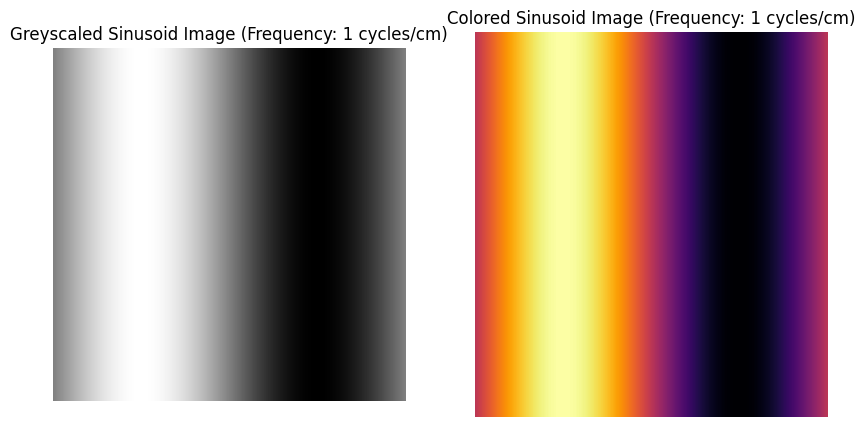

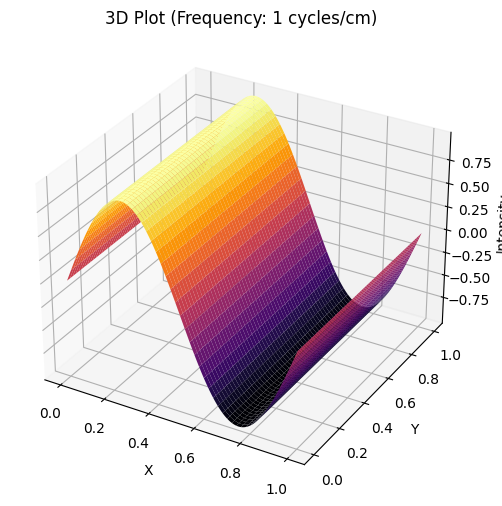

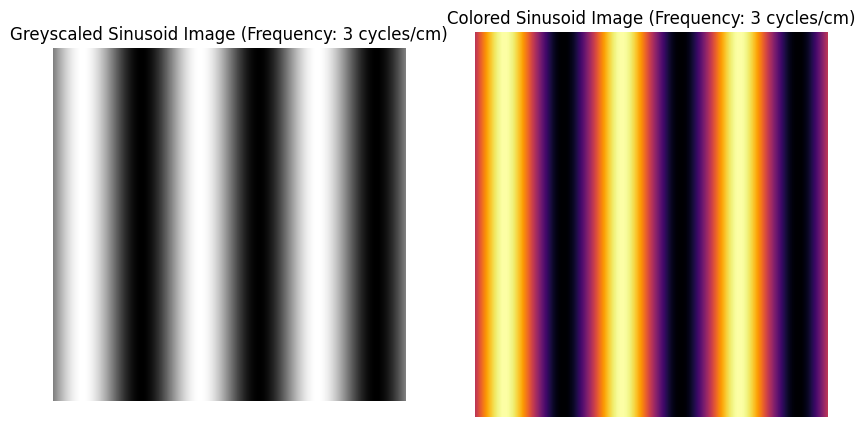

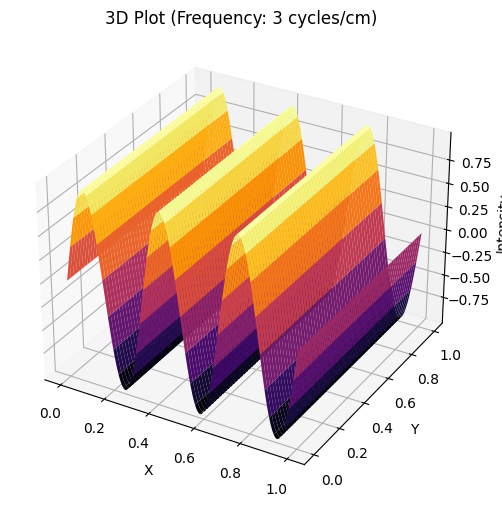

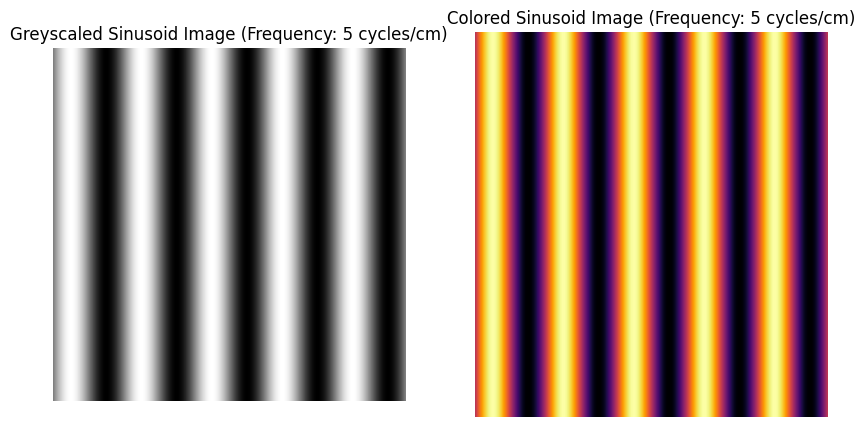

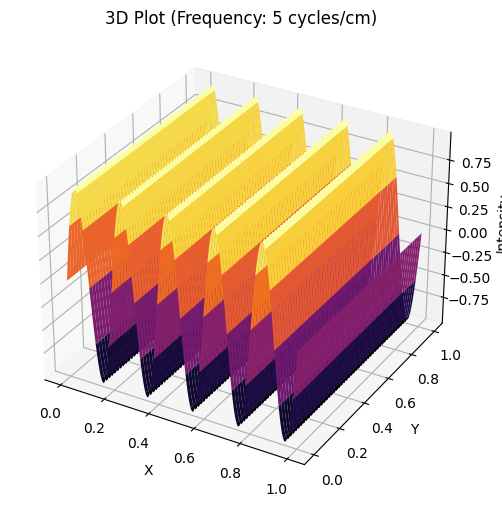

In [ ]:

def generate_sinusoid_image(frequency, size=400):
    x = np.linspace(0, 1, size)
    y = np.sin(2 * np.pi * frequency * x)

    # 1d sine wave to 2d image
    image = np.outer(np.ones(size), y)

    return image

def plot_image_and_heatmap(image, frequency):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    axs[0].imshow(image, cmap='gray')
    axs[0].set_title(f'Greyscaled Sinusoid Image (Frequency: {frequency} cycles/cm)')
    axs[0].axis('off')

    axs[1].imshow(image, cmap='inferno', aspect='auto')
    axs[1].set_title(f'Colored Sinusoid Image (Frequency: {frequency} cycles/cm)')
    axs[1].axis('off')

    plt.show()

def plot_3d(image, frequency):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    x = np.linspace(0, 1, image.shape[0])
    y = np.linspace(0, 1, image.shape[1])
    X, Y = np.meshgrid(x, y)

    ax.plot_surface(X, Y, image, cmap='inferno')
    ax.set_title(f'3D Plot (Frequency: {frequency} cycles/cm)')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Intensity')

    plt.show()

frequencies = [1, 3, 5]
for freq in frequencies:
    image = generate_sinusoid_image(freq)
    plot_image_and_heatmap(image, freq)
    plot_3d(image, freq)

Discussion: The images show the colors values increasing and decreasing to represent the sine wave. The 3d plot also visualizes it from a different angle.

#### PART 2 - Create color images *(30 points)*

Recreate the Olympics logo as an image. It is fine if the colors overlap where the rings intersect.

Sample output is uploaded to the Google Drive Datasets folder: https://drive.google.com/file/d/1770FiH4FPm0C_fCpRGorr64x-RIv9UOY/view?usp=drive_link

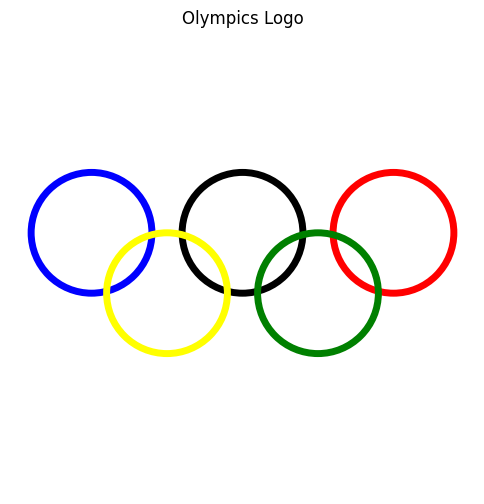

In [ ]:
def draw_olympics_logo():
    fig, ax = plt.subplots(figsize=(6, 6))

    # Draw circles for each ring
    radius = 1
    linewidth = 0.5
    colors = ['black', 'blue', 'red', 'yellow', 'green']
    positions = [(0, 0), (-2.5, 0), (2.5, 0), (-1.25, -1), (1.25, -1)]
    for color, position in zip(colors, positions):
        circle = Circle(position, radius, color=color,linewidth = 5, fill=False)
        ax.add_patch(circle)

    # Set aspect ratio to equal and remove axes
    ax.set_aspect('equal', 'box')
    ax.axis('equal')
    ax.axis('off')

    plt.title('Olympics Logo')
    plt.show()

draw_olympics_logo()


Discussion: For the olympics logo code, the rings' intersections dont mix colors. There seem to be many ways to create the olympic logo, but i simply went with just this way with plots.

#### PART 3 - Apply image enhancement *(40 points)*

Apply contrast stretching to an astronaut image.

Show the following:
1. [20 pts.] Original and contrast-stretched image
2. [10 pts.] Probability Distribution Function (PDF) plot showing curves for the original and contrast-stretched image
3. [10 pts.] Cumulative Distribution Function (CDF) plot showing curves for the original and contrast-stretched image

Sample output is uploaded to the Google Drive Datasets folder: https://drive.google.com/file/d/12-cPwAr7hVUPBKIthvcQgvqjvEOmwyxJ/view?usp=drive_link

First step is to load the image-- available from the scikit-image (skimage) library-- and make a low-contrast version, using the code below:

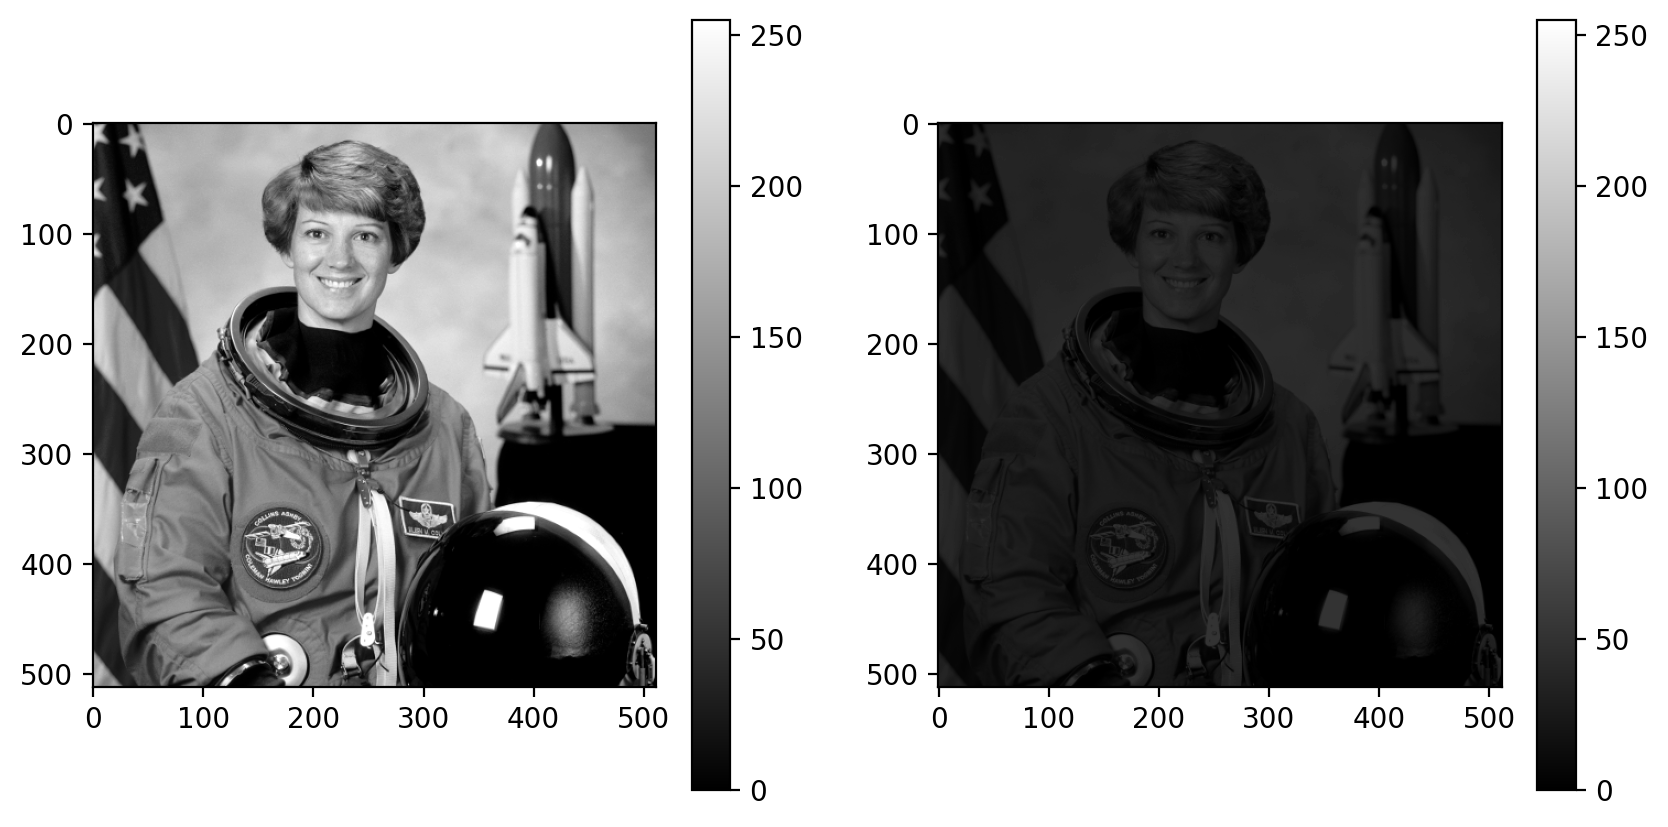

In [ ]:
from skimage import color, data, exposure
from skimage.transform import rescale

img = color.rgb2gray(data.astronaut())*256 # original astronaut image
plt.figure(figsize=(10,5), dpi = 200)
plt.subplot(121)
plt.imshow(img, cmap = 'gray', vmax = 255)
plt.colorbar()

img_low_contrast = img/5 # low contrast astronaut image
plt.subplot(122)
plt.imshow(img_low_contrast, cmap = 'gray', vmax = 255)
plt.colorbar()

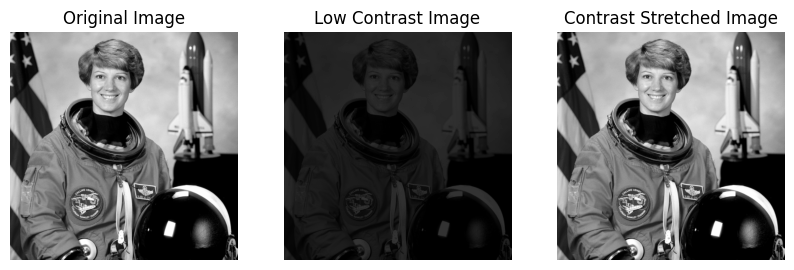

In [ ]:
#import cv2
import numpy as np
import matplotlib.pyplot as plt

# Perform contrast stretching
min_val = np.min(img_low_contrast)
max_val = np.max(img_low_contrast)
stretched = 255 * ((img_low_contrast - min_val) / (max_val - min_val))

# Convert to uint8 (required for displaying with OpenCV)
#stretched = stretched.astype(np.uint8)

# Display original and stretched images
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(color.rgb2gray(data.astronaut()), cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_low_contrast, cmap='gray',vmax = 255)
plt.title('Low Contrast Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(stretched, cmap='gray')
plt.title('Contrast Stretched Image')
plt.axis('off')
plt.show()


Next, write your code to apply contrast stretching, calculate the PDF and CDF of the original and contrast-stretched images. Finally, display the images and PDF and CDF plots.

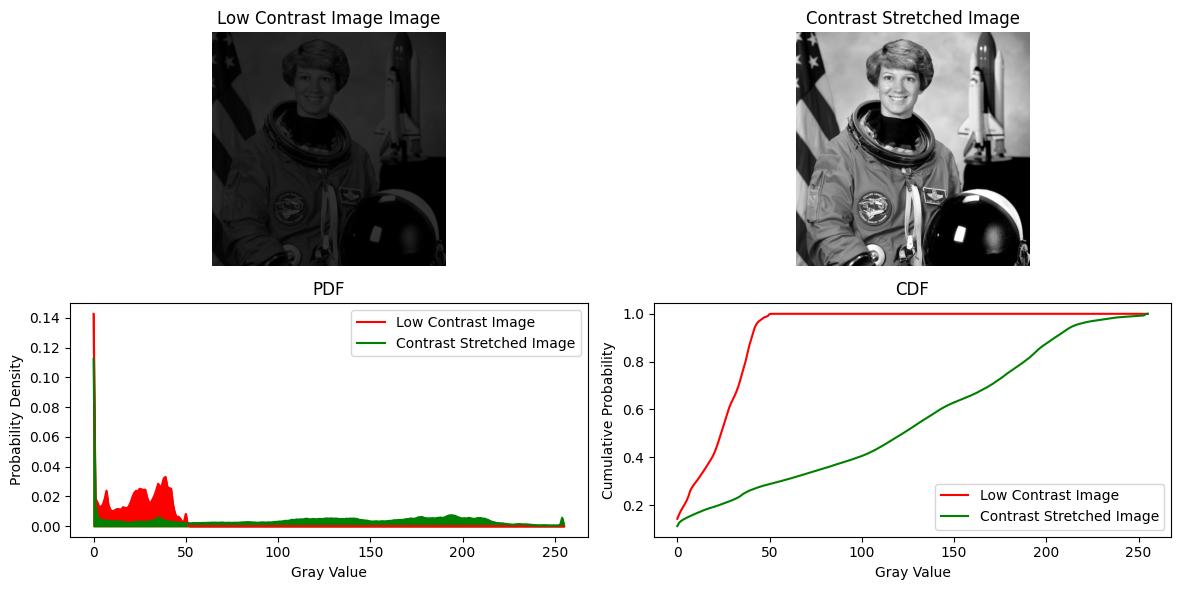

In [ ]:
def calculate_pdf_cdf(image):
    # Flatten the image array
    flattened = image.flatten()

    # Calculate PDF (Probability Density Function)
    pdf, _ = np.histogram(flattened, bins=256, range=[0,256], density=True)

    # Calculate CDF (Cumulative Distribution Function)
    cdf = np.cumsum(pdf)

    return pdf, cdf

# Calculate PDF and CDF for original and stretched images
pdf_original, cdf_original = calculate_pdf_cdf(img_low_contrast)
pdf_stretched, cdf_stretched = calculate_pdf_cdf(stretched)

# Display original and stretched images
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.imshow(img_low_contrast, cmap='gray',vmax = 255)
plt.title('Low Contrast Image Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(stretched, cmap='gray')
plt.title('Contrast Stretched Image')
plt.axis('off')

# Plot PDF for original and stretched images
plt.subplot(2, 2, 3)
plt.plot(pdf_original, color='r', label='Low Contrast Image')
plt.plot(pdf_stretched, color='g', label='Contrast Stretched Image')
plt.title('PDF')
plt.xlabel('Gray Value')
plt.ylabel('Probability Density')
plt.fill_between(range(len(pdf_original)), pdf_original, color='r', alpha=1)
plt.fill_between(range(len(pdf_stretched)), pdf_stretched, color='g', alpha=1)
plt.legend()

# Plot CDF for original and stretched images
plt.subplot(2, 2, 4)
plt.plot(cdf_original, color='r', label='Low Contrast Image')
plt.plot(cdf_stretched, color='g', label='Contrast Stretched Image')
plt.title('CDF')
plt.xlabel('Gray Value')
plt.ylabel('Cumulative Probability')
plt.legend()

plt.tight_layout()
plt.show()

Discussion: I though when asking for original they meant the one with normal contrast, so when i was outputting the pdf and cdf they were identical, turns out the original they were referring to was tha low contrast image that was contrast-stretched. This could indicate that the contrast stretched image is identical to the original greyscaled astronaut image.

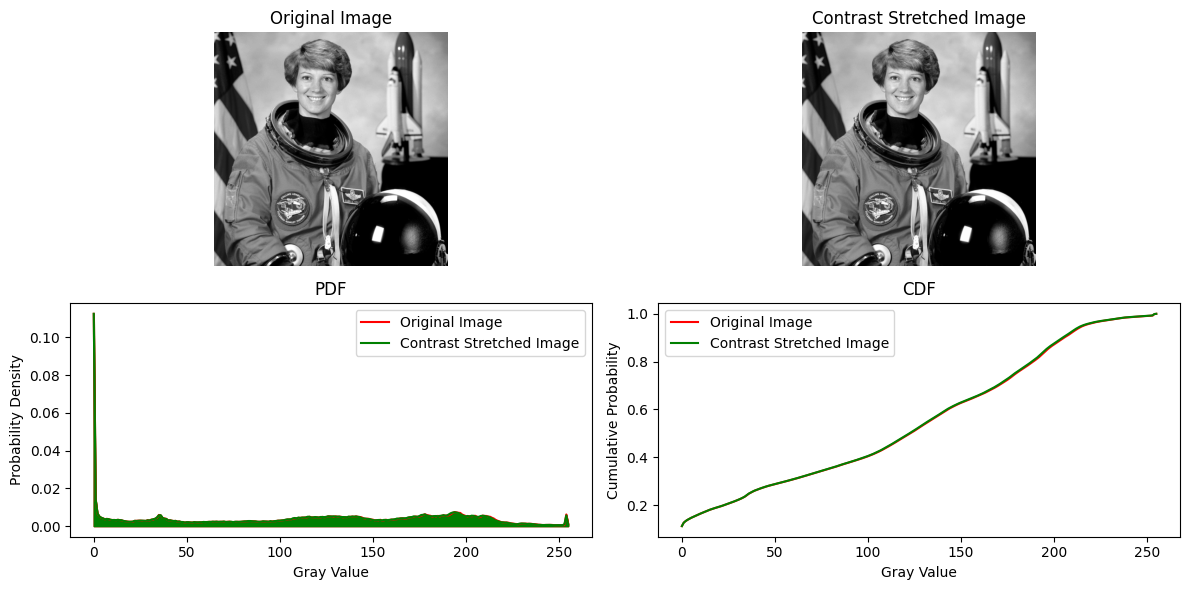

In [ ]:
pdf_original, cdf_original = calculate_pdf_cdf(img)
pdf_stretched, cdf_stretched = calculate_pdf_cdf(stretched)
# Display original and stretched images
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray',vmax = 255)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(stretched, cmap='gray')
plt.title('Contrast Stretched Image')
plt.axis('off')

# Plot PDF for original and stretched images
plt.subplot(2, 2, 3)
plt.plot(pdf_original, color='r', label='Original Image')
plt.plot(pdf_stretched, color='g', label='Contrast Stretched Image')
plt.title('PDF')
plt.xlabel('Gray Value')
plt.ylabel('Probability Density')
plt.fill_between(range(len(pdf_original)), pdf_original, color='r', alpha=1)
plt.fill_between(range(len(pdf_stretched)), pdf_stretched, color='g', alpha=1)
plt.legend()

# Plot CDF for original and stretched images
plt.subplot(2, 2, 4)
plt.plot(cdf_original, color='r', label='Original Image')
plt.plot(cdf_stretched, color='g', label='Contrast Stretched Image')
plt.title('CDF')
plt.xlabel('Gray Value')
plt.ylabel('Cumulative Probability')
plt.legend()

plt.tight_layout()
plt.show()